In [1]:
from qiskit.transpiler import PassManager, InstructionDurations

In [2]:
import os
os.getcwd()
os.chdir('/home/siyuan/Seafile/Thesis/PycharmProjects/DD_PE_paper/')

In [3]:
from qiskit import IBMQ, transpile, Aer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_guadalupe')

In [4]:
from src.tools.DD_insertion import construct_bv_circuit, \
                                 construct_graph_matrix, \
                                 convert_count_to_prob, \
                                 translate_circuit_to_basis

In [5]:
from qiskit.circuit.library import QFT, GraphState

In [6]:
bv_circuits = []
hs_circuits = []
qft_circuits = []
for i in range(3, 15):
    bv_circuits.append(construct_bv_circuit(i))

# for i in range(2, 15, 2):
#     hs_circuits.append(construct_hs_circuit(i))

for i in range(3, 15):
    qft_circuits.append(QFT(i))

for circuit in bv_circuits:
    circuit.measure_all()

# for circuit in hs_circuits:
#     circuit.measure_all()

for circuit in qft_circuits:
    circuit.measure_all()

In [7]:
durations = InstructionDurations.from_backend(backend)
## add duration of y gates which are used for DD sequences
bconf = backend.configuration()
for i in range(bconf.num_qubits):
    x_duration = durations.get('x', i)
    durations.update(InstructionDurations(
        [('y', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('rx', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('ry', i, x_duration)]
        ))

In [8]:
graph_state_circuits = []
coupling_map = backend.configuration().coupling_map

for i in range(3, 15):
    gs_circuit_matrix = construct_graph_matrix(i, coupling_map)
    graph_state_circuits.append(GraphState(gs_circuit_matrix))

for circuit in graph_state_circuits:
    circuit.measure_all()

In [9]:
from src.tools.DD_insertion import pm_DD_sequences
pms = pm_DD_sequences(durations)


In [10]:
bv_job_ids = []
bv_jobs = []

for circuit in bv_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    bv_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    bv_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d5f0f33cdbd0642e0698
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d5f24ad655495d9e4aa5
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d5f4bc0d0223f9dbecf5
if applied DD for None: False
if applied DD fo

In [11]:
for job_id in bv_job_ids:
    print(job_id)

6295d5f0f33cdbd0642e0698
6295d5f24ad655495d9e4aa5
6295d5f4bc0d0223f9dbecf5
6295d5fa9baeab694e4acd6e
6295d5fc9baeab7fa94acd6f
6295d5ff3bb4af70ddb95504
6295d602bc0d025407dbecf6
6295d6049baeab12644acd70
6295d607bc0d026927dbecf7
6295d60a16cdc45025f25e42
6295d60d3bb4af2e86b95505
6295d610f33cdb32332e069a


In [9]:
from qiskit import execute

shots = 8192
psts = []
bv_job_ids = [
    '6295d5f0f33cdbd0642e0698',
    '6295d5f24ad655495d9e4aa5',
    '6295d5f4bc0d0223f9dbecf5',
    '6295d5fa9baeab694e4acd6e',
    '6295d5fc9baeab7fa94acd6f',
    '6295d5ff3bb4af70ddb95504',
    '6295d602bc0d025407dbecf6',
    '6295d6049baeab12644acd70',
    '6295d607bc0d026927dbecf7',
    '6295d60a16cdc45025f25e42',
    '6295d60d3bb4af2e86b95505',
    '6295d610f33cdb32332e069a',

]
for i, circuit in enumerate(bv_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    ideal_result = list(ideal_counts.keys())[0]
    result_counts = backend.retrieve_job(bv_job_ids[i]).result().get_counts()
    pst = []
    for result_count in result_counts:
        obtain_results = result_count.get(ideal_result, 0)
        pst.append(obtain_results/shots)
    psts.append(pst)

bv_circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12', 'BV13', 'BV14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']
bv_results_data = {}

for i, name in enumerate(bv_circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, pst in enumerate(psts[i]):
        print(f'pst result of {DD_sequences[j]}: {pst}')
    bv_results_data[name] = psts[i]

---------Result of circuit BV3 -------------
pst result of no_dd: 0.449462890625
pst result of hahn_X: 0.4566650390625
pst result of hahn_Y: 0.449462890625
pst result of CP: 0.460205078125
pst result of CPMG: 0.4444580078125
pst result of xy4: 0.4556884765625
pst result of xy8: 0.4525146484375
pst result of xy16: 0.4503173828125
pst result of udd1: 0.446533203125
pst result of udd2: 0.440673828125
pst result of kdd: 0.4407958984375
---------Result of circuit BV4 -------------
pst result of no_dd: 0.3656005859375
pst result of hahn_X: 0.3614501953125
pst result of hahn_Y: 0.365478515625
pst result of CP: 0.3656005859375
pst result of CPMG: 0.363525390625
pst result of xy4: 0.365966796875
pst result of xy8: 0.3729248046875
pst result of xy16: 0.3775634765625
pst result of udd1: 0.372314453125
pst result of udd2: 0.36328125
pst result of kdd: 0.364990234375
---------Result of circuit BV5 -------------
pst result of no_dd: 0.138916015625
pst result of hahn_X: 0.146484375
pst result of hahn

In [10]:
bv_results_data

{'BV3': [0.449462890625,
  0.4566650390625,
  0.449462890625,
  0.460205078125,
  0.4444580078125,
  0.4556884765625,
  0.4525146484375,
  0.4503173828125,
  0.446533203125,
  0.440673828125,
  0.4407958984375],
 'BV4': [0.3656005859375,
  0.3614501953125,
  0.365478515625,
  0.3656005859375,
  0.363525390625,
  0.365966796875,
  0.3729248046875,
  0.3775634765625,
  0.372314453125,
  0.36328125,
  0.364990234375],
 'BV5': [0.138916015625,
  0.146484375,
  0.1356201171875,
  0.2589111328125,
  0.2479248046875,
  0.2652587890625,
  0.254638671875,
  0.244873046875,
  0.2802734375,
  0.2333984375,
  0.2318115234375],
 'BV6': [0.1339111328125,
  0.1380615234375,
  0.1409912109375,
  0.2813720703125,
  0.2935791015625,
  0.273681640625,
  0.277587890625,
  0.236083984375,
  0.2735595703125,
  0.2640380859375,
  0.219482421875],
 'BV7': [0.0445556640625,
  0.0419921875,
  0.0400390625,
  0.0809326171875,
  0.0849609375,
  0.136474609375,
  0.1903076171875,
  0.2125244140625,
  0.20739746093

Text(0, 0.5, 'Relative PST')

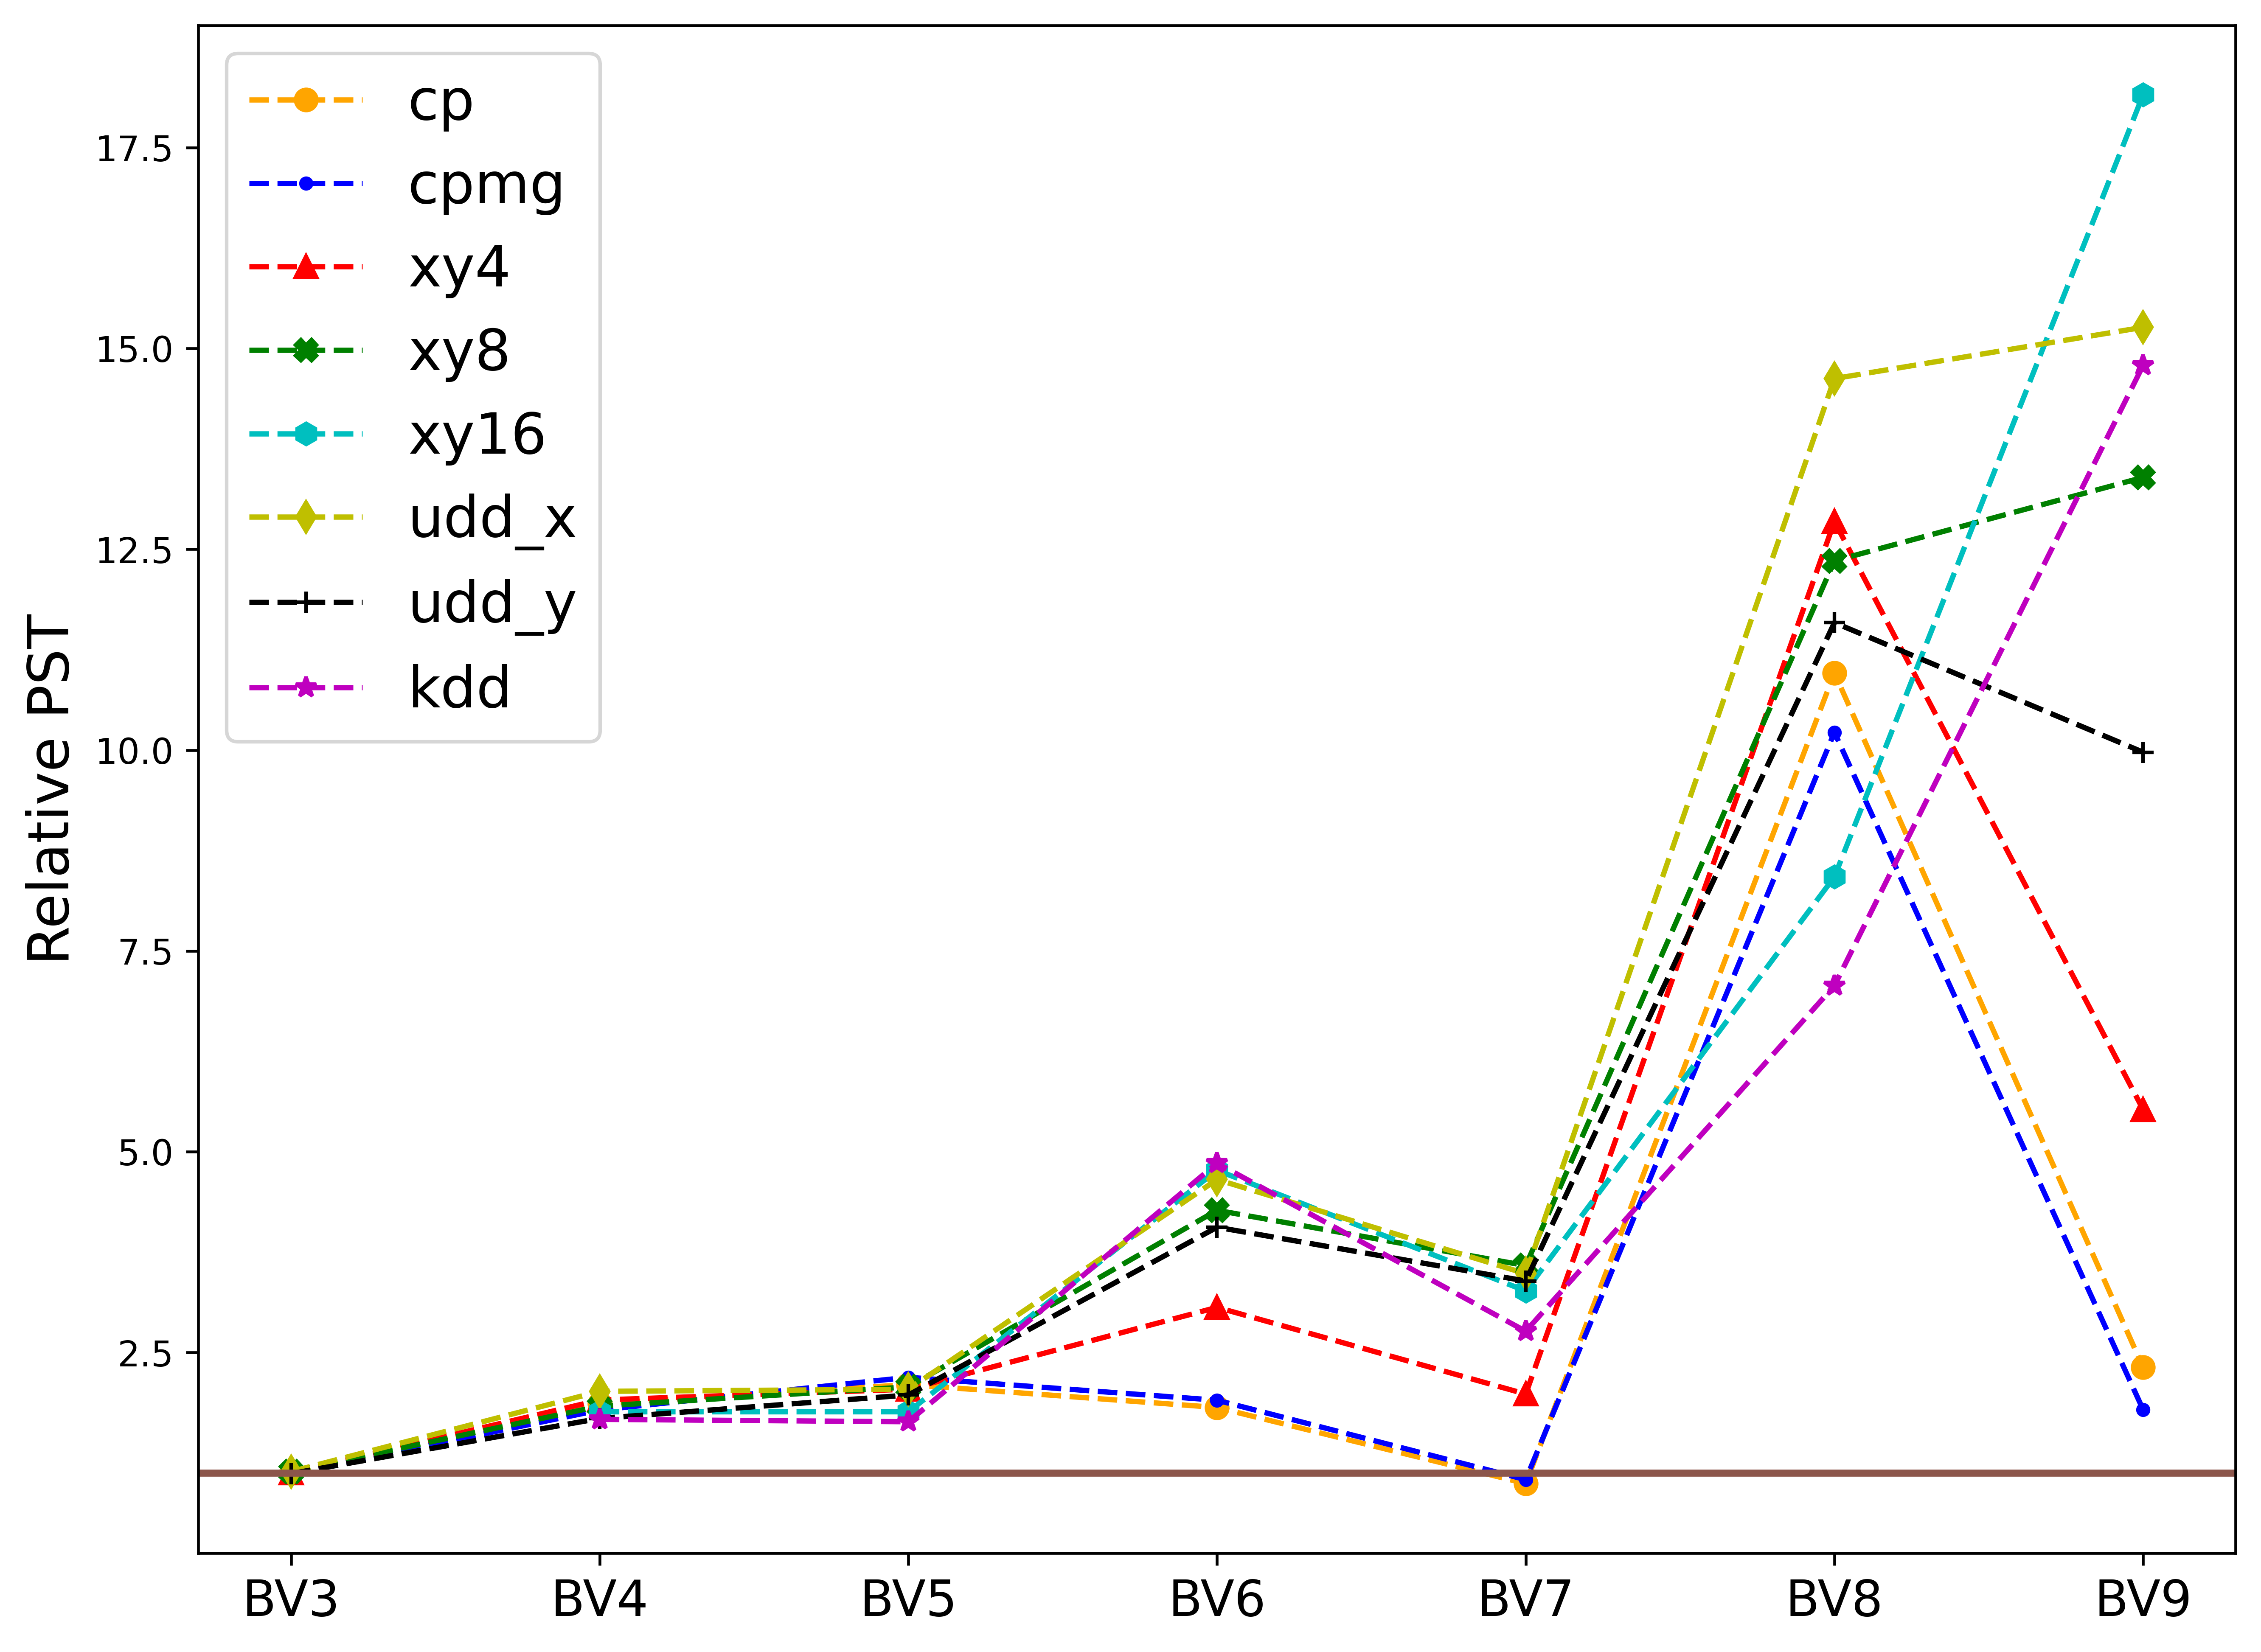

In [11]:
import numpy as np
import matplotlib.pyplot as plt

baseline = []
data = []
for name in bv_circuit_names:
    result_data = bv_results_data[name]
    baseline.append(result_data[0])
    ratio = [i/result_data[0] for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[1:, 2]
cpmg = data[1:, 3]
xy4 = data[1:, 4]
xy8 = data[1:, 5]
xy16 = list(data[2:, 6])
xy16.insert(0, None)
udd_X = data[1:, 7]
udd_Y = data[1:, 8]
kdd = list(data[2:, 9])
kdd.insert(0, None)

circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12',]

x_ticks = circuit_names[:7]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2][:7], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2][:7], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2][:7], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2][:7], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2][:7], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2][:7], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2][:7], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2][:7], linestyle='--', marker='*', color='m', label='kdd')

plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative PST result for BV circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative PST', fontsize=16)
# plt.savefig('TQE_Relat_PST_BV_guadalupe_0530.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
gs_job_ids = []
gs_jobs = []

for circuit in graph_state_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    gs_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    gs_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d612f33cdb0e132e069b
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6139baeabc6774acd71
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6151ea57f4d5bebd621
if applied DD for None: False
if applied DD for N

In [13]:
for job_id in gs_job_ids:
    print(job_id)

6295d612f33cdb0e132e069b
6295d6139baeabc6774acd71
6295d6151ea57f4d5bebd621
6295d616f33cdbcb832e069c
6295d61f0212ff6c38251f16
6295d6213bb4af429cb95506
6295d6234bb9753b99efb4cb
6295d6251ea57f7ef2ebd622
6295d62af33cdbd9cd2e069d
6295d63516cdc44100f25e43
6295d6373bb4af4e53b95507
6295d6384bb97533b6efb4cc


In [12]:
from scipy.spatial.distance import jensenshannon
from qiskit import execute
gs_jsds = []

gs_job_ids = [
    '6295d612f33cdb0e132e069b',
    '6295d6139baeabc6774acd71',
    '6295d6151ea57f4d5bebd621',
    '6295d616f33cdbcb832e069c',
    '6295d61f0212ff6c38251f16',
    '6295d6213bb4af429cb95506',
    '6295d6234bb9753b99efb4cb',
    '6295d6251ea57f7ef2ebd622',
    '6295d62af33cdbd9cd2e069d',
    '6295d63516cdc44100f25e43',
    '6295d6373bb4af4e53b95507',
    '6295d6384bb97533b6efb4cc',
]


shots = 8192

for i, circuit in enumerate(graph_state_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(gs_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    gs_jsds.append(jsd)

circuit_names = ['GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12', 'GS13', 'GS14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

gs_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(gs_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    gs_results_data[name] = gs_jsds[i]

---------Result of circuit GS3 -------------
jsd result of no_dd: 0.013454126957619496
jsd result of hahn_X: 0.012935901558461917
jsd result of hahn_Y: 0.011811658581701644
jsd result of CP: 0.01575450700692713
jsd result of CPMG: 0.011580141294688536
jsd result of xy4: 0.013780252097199568
jsd result of xy8: 0.010310330519251733
jsd result of xy16: 0.013845072361937187
jsd result of udd1: 0.017914820226214326
jsd result of udd2: 0.025332741668706894
jsd result of kdd: 0.020141085565510763
---------Result of circuit GS4 -------------
jsd result of no_dd: 0.03666277871847652
jsd result of hahn_X: 0.03110866109319031
jsd result of hahn_Y: 0.03505172700251485
jsd result of CP: 0.039090302246747824
jsd result of CPMG: 0.03439840840160763
jsd result of xy4: 0.04553587292184965
jsd result of xy8: 0.028848189592440156
jsd result of xy16: 0.02757707708207863
jsd result of udd1: 0.03820848652346354
jsd result of udd2: 0.039426729869864736
jsd result of kdd: 0.04389120713095107
---------Result o

In [14]:
# baseline = []

# data = []
# for name in circuit_names:
#     result_data = gs_results_data[name]
#     baseline.append(result_data[0])
#     ratio = [result_data[0]/i for i in result_data[1:]]
#     data.append(ratio)


# data = np.array(data)

# # hahn_X = data[:, 0]
# # hahn_Y = data[:, 1]
# cp = data[:, 2]
# cpmg = data[:, 3]
# xy4 = data[:, 4]
# xy8 = data[:, 5]
# xy16 = data[:, 6]
# udd_X = data[:, 7]
# udd_Y = data[:, 8]
# kdd = data[:, 9]

# x_ticks = circuit_names[:-2]
# X = np.arange(len(x_ticks))

# from matplotlib.pyplot import figure
# fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
# ax = fig.add_axes([0,0,1,1])

# # plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# # plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
# plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
# plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
# plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
# plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
# plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
# plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
# plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
# plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
# plt.axhline(1, color='tab:brown', lw=2)
# plt.legend(loc='best', fontsize=16)
# # ax.set_title('Relative JSD result for GS circuit on ibmq_guadalupe', fontsize=18)
# ax.set_xticks(X)
# ax.set_xticklabels(x_ticks, fontsize=14)
# ax.set_ylabel('Relative JSD', fontsize=16)

# plt.savefig('TQE_Relat_JSD_GS_guadalupe_T_0530.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
qft_job_ids = []
qft_jobs = []

for circuit in qft_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    qft_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    qft_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d63b0212ffd087251f17
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d63d16cdc45777f25e44
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6403bb4af6444b95508
if applied DD for None: False
if applied DD for N

In [15]:
for job_id in qft_job_ids:
    print(job_id)

6295d63b0212ffd087251f17
6295d63d16cdc45777f25e44
6295d6403bb4af6444b95508
6295d6444bb975cd6befb4cd
6295d6481ea57f67eaebd623
6295d64d9baeab67524acd74
6295d652bc0d023529dbecfa
6295d65a0212ff7c08251f19
6295d6629baeab28ff4acd76
6295d66bf33cdb6d7b2e06a1
6295d67616cdc45815f25e46
6295d6880212ff79d2251f1b


In [15]:
from scipy.spatial.distance import jensenshannon
qft_jsds = []

qft_job_ids = [
    '6295d63b0212ffd087251f17',
    '6295d63d16cdc45777f25e44',
    '6295d6403bb4af6444b95508',
    '6295d6444bb975cd6befb4cd',
    '6295d6481ea57f67eaebd623',
    '6295d64d9baeab67524acd74',
    '6295d652bc0d023529dbecfa',
    '6295d65a0212ff7c08251f19',
    '6295d6629baeab28ff4acd76',
    '6295d66bf33cdb6d7b2e06a1',
    '6295d67616cdc45815f25e46',
    '6295d6880212ff79d2251f1b'
]

shots = 8192

for i, circuit in enumerate(qft_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(qft_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    qft_jsds.append(jsd)

circuit_names = ['QFT3', 'QFT4', 'QFT5', 'QFT6', 'QFT7', 'QFT8', 'QFT9', 'QFT10', 'QFT11', 'QFT12', 'QFT13', 'QFT14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

qft_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(qft_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    qft_results_data[name] = qft_jsds[i]

---------Result of circuit QFT3 -------------
jsd result of no_dd: 0.1189182980966079
jsd result of hahn_X: 0.11690119902603702
jsd result of hahn_Y: 0.11422570892295661
jsd result of CP: 0.12604766962200142
jsd result of CPMG: 0.12429183714893328
jsd result of xy4: 0.12787272807490158
jsd result of xy8: 0.11233133227873668
jsd result of xy16: 0.1230739946945985
jsd result of udd1: 0.11772432637023944
jsd result of udd2: 0.13588001358252852
jsd result of kdd: 0.12045160384433824
---------Result of circuit QFT4 -------------
jsd result of no_dd: 0.1170181298264769
jsd result of hahn_X: 0.11851681117150455
jsd result of hahn_Y: 0.11698482148752895
jsd result of CP: 0.12205411881184056
jsd result of CPMG: 0.1306593777312388
jsd result of xy4: 0.13298876323614253
jsd result of xy8: 0.13509865149525394
jsd result of xy16: 0.13211776355131558
jsd result of udd1: 0.12699519887122845
jsd result of udd2: 0.1101958677987772
jsd result of kdd: 0.11630757052523268
---------Result of circuit QFT5 -

In [16]:
qft_results_data

{'QFT3': [0.1189182980966079,
  0.11690119902603702,
  0.11422570892295661,
  0.12604766962200142,
  0.12429183714893328,
  0.12787272807490158,
  0.11233133227873668,
  0.1230739946945985,
  0.11772432637023944,
  0.13588001358252852,
  0.12045160384433824],
 'QFT4': [0.1170181298264769,
  0.11851681117150455,
  0.11698482148752895,
  0.12205411881184056,
  0.1306593777312388,
  0.13298876323614253,
  0.13509865149525394,
  0.13211776355131558,
  0.12699519887122845,
  0.1101958677987772,
  0.11630757052523268],
 'QFT5': [0.17425924567523238,
  0.1799707568895333,
  0.16740815033512962,
  0.15117804698060888,
  0.14309079882049397,
  0.13913359972715791,
  0.14668922479985116,
  0.15905531414895296,
  0.16486546130208798,
  0.16696451510364965,
  0.16274844136003044],
 'QFT6': [0.10523175010076574,
  0.09900277211299868,
  0.0967715784052389,
  0.09195812689806614,
  0.09189095241096615,
  0.07936274162836551,
  0.08967765729305874,
  0.07446517667566198,
  0.11335749185846894,
  0.10

In [17]:
# import matplotlib.pyplot as plt
# baseline = []

# data = []
# for name in circuit_names:
#     result_data = qft_results_data[name]
#     baseline.append(result_data[0])
#     ratio = [result_data[0]/i for i in result_data[1:]]
#     data.append(ratio)


# data = np.array(data)

# # hahn_X = data[:, 0]
# # hahn_Y = data[:, 1]
# cp = data[:, 2]
# cpmg = data[:, 3]
# xy4 = data[:, 4]
# xy8 = data[:, 5]
# xy16 = data[:, 6]
# udd_X = data[:, 7]
# udd_Y = data[:, 8]
# kdd = data[:, 9]

# x_ticks = circuit_names[:-2]
# X = np.arange(len(x_ticks))

# from matplotlib.pyplot import figure
# fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
# ax = fig.add_axes([0,0,1,1])

# # plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# # plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
# plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
# plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
# plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
# plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
# plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
# plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
# plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
# plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
# plt.axhline(1, color='tab:brown', lw=2)
# plt.legend(loc='best', fontsize=16)
# # ax.set_title('Relative JSD result for QFT circuit on ibmq_guadalupe', fontsize=18)
# ax.set_xticks(X)
# ax.set_xticklabels(x_ticks, fontsize=14)
# ax.set_ylabel('Relative JSD', fontsize=16)

# plt.savefig('TQE_Relat_JSD_QFT_guadalupe_0530.pdf', bbox_inches='tight', pad_inches=0)